<a href="https://www.kaggle.com/code/collindrake/1-from-simple-lines-to-complex-insights?scriptVersionId=164069992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Exercise 1: Linear Regression with a Simple Dataset

---

Imagine you're trying to guess the price of a house. One of the first things you might look at is how big the house is, right? Linear regression is just a fancy way of doing exactly that with math. It finds a line that best fits the relationship between the house's size (like how many square feet it has) and its price. This line helps us predict the price of a house based on its size. It's like drawing a straight line through a bunch of points on a graph to see the general direction they're heading.

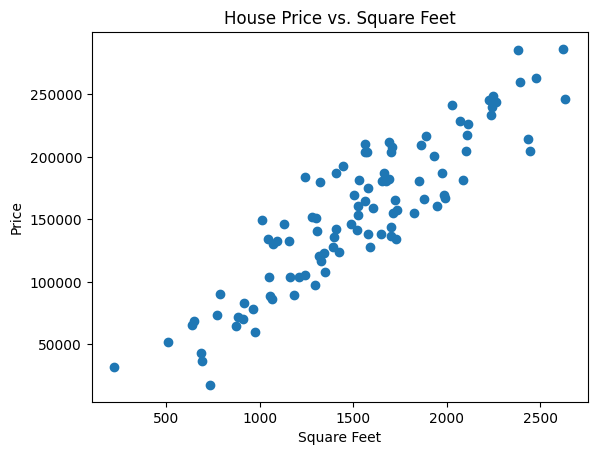

Intercept: -6723.555389665678, Coefficient: 105.73492167731904


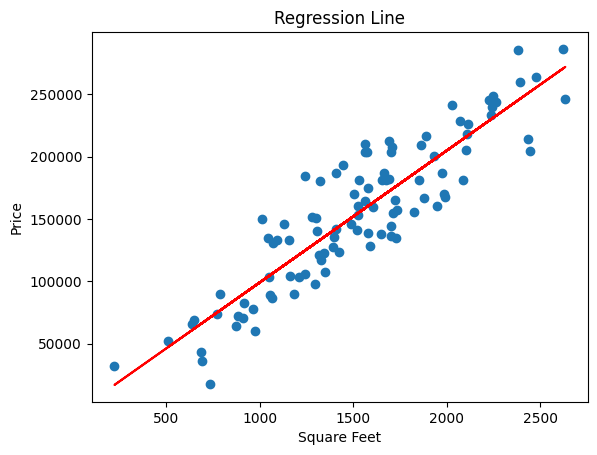

In [2]:
# Generate a synthetic dataset
np.random.seed(0) # For reproducibility
square_feet = np.random.normal(1500, 500, 100)
prices = square_feet * 100 + np.random.normal(0, 25000, 100)  # Base price per square foot + noise

# Prepare and visualize the data
data = pd.DataFrame({'SquareFeet': square_feet, 'Price': prices})
plt.scatter(data['SquareFeet'], data['Price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('House Price vs. Square Feet')
plt.show()

# Perform linear regression
X = data[['SquareFeet']]
y = data['Price']
model = LinearRegression()
model.fit(X, y)

# Display the coefficients
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")

# Visualize the regression line
predictions = model.predict(X)
plt.scatter(data['SquareFeet'], data['Price'])
plt.plot(data['SquareFeet'], predictions, color='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Regression Line')
plt.show()

## Exercise 2: Exploring Multicollinearity

---

Multicolinearity is actually quite simple,
as it refers to data which follow similar trends. 
For example, if a home's square footage increases, 
then its bedrooms are also likely to increase.
Thereby, square footage and bedrooms are colinear
features.

Now, let's say you're not just looking at the size of the house but also considering how many bedrooms it has and how old it is. All these things together also affect the price. But what if the number of bedrooms and the size of the house usually increase together? It's like saying, "bigger houses tend to have more bedrooms." This situation can make it tricky to figure out which one (size or number of bedrooms) is really affecting the price more. Multicollinearity is just a fancy term for this kind of mix-up, where it's hard to tell one influence apart from another because they move together.


In [3]:
# Extend the dataset with more features
data['Bedrooms'] = np.random.randint(2, 5, 100)
data['HouseAge'] = np.random.randint(0, 50, 100)

# Check for multicollinearity
variables = data[['SquareFeet', 'Bedrooms', 'HouseAge']]
vif_data = pd.DataFrame()
vif_data["feature"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(len(variables.columns))]

print(vif_data)

# Note: High VIF values indicate multicollinearity


      feature       VIF
0  SquareFeet  6.129698
1    Bedrooms  6.680069
2    HouseAge  3.503852


Because high VIF values indicate multicolinearity, 
we can easily identify our most significant features in predicting price: 
square footage and bedrooms.

For the the curious among you

$
\text{VIF}_i = \frac{1}{1 - R_i^2}
$

Where:
- $VIF_i$ represents the Variable Inflation Factor fot the $i$-th variable.
- $R^2_i$ is the coefficient of determination of a regression of the $i$-th variable on all the other variables.

In simpler terms, $R^2_i$ is a measure of how well the $i$-th
variable can be predicted using the other independent variables in the model. 
A higher $R^2_i$ means that the variable can be well predicted by the others,
indicating potential multicollinearity and leading to a higher VIF. 
A VIF value greater than 5 or 10 indicates a problematic level of multicollinearity, 
depending on the source.






## Exercise 3: Detecting and Handling Outliers

---

Imagine you're looking at a bunch of houses to figure out how size relates to price, but there's this one mansion that's super expensive and way bigger than all the others. This mansion is an outlier — it's so different that it can throw off your understanding of what's typical. Detecting outliers means finding these odd ones out. Handling them might mean ignoring the mansion when you're trying to understand what's normal for most houses. This way, the mansion doesn't make you think that houses are generally more expensive or bigger than they actually are.

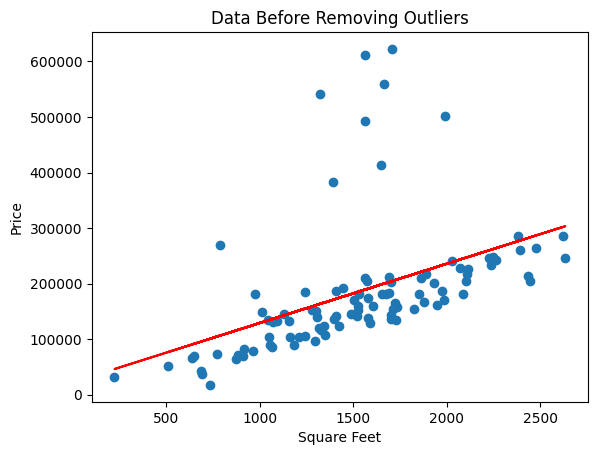

In [4]:
# Introduce outliers
data.loc[data.sample(frac=0.1).index, 'Price'] = data['Price'] * 3

# Perform linear regression
X = data[['SquareFeet']]
y = data['Price']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Plot with outliers
plt.scatter(data['SquareFeet'], data['Price'])
plt.plot(data['SquareFeet'], predictions, color='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Data Before Removing Outliers')
plt.show()

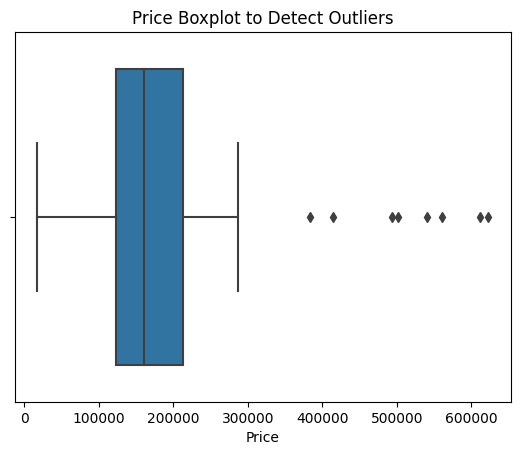

In [5]:
# Clear the plot
plt.clf()

# Visualize to detect outliers
sns.boxplot(x=data['Price'])
plt.title('Price Boxplot to Detect Outliers')
plt.show()

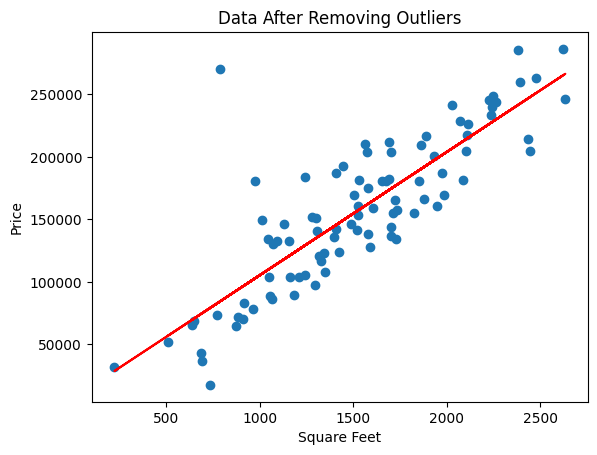

In [6]:
# Clear the plot
plt.clf()

# Simple outlier handling: Remove outliers
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
data_filtered = data.query('(@Q1 - 1.5 * @IQR) <= Price <= (@Q3 + 1.5 * @IQR)')

# Perform linear regression
X = data_filtered[['SquareFeet']]
y = data_filtered['Price']
model = LinearRegression()
model.fit(X, y)
filtered_predictions = model.predict(X)

# Visualize data after removing outliers
plt.scatter(data_filtered['SquareFeet'], data_filtered['Price'])
plt.plot(data_filtered['SquareFeet'], filtered_predictions, color='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Data After Removing Outliers')
plt.show()

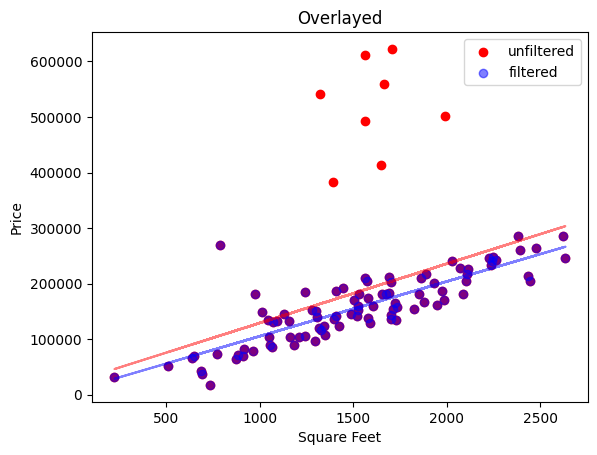

In [7]:
# Clear the plot
plt.clf()

# Visualize both
plt.scatter(data['SquareFeet'], data['Price'], color='red', label='unfiltered')
plt.plot(data['SquareFeet'], predictions, color='red', alpha=0.5)
plt.scatter(data_filtered['SquareFeet'], data_filtered['Price'], color='blue', alpha=0.5, label='filtered')
plt.plot(data_filtered['SquareFeet'], filtered_predictions, color='blue', alpha=0.5)
plt.legend()
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Overlayed')
plt.show()